In [395]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [396]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/Estadistica_Meteo/' # Directorio de trabajo

os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [398]:
df = pd.read_csv('Granja Kcayra.txt', sep=' ')
df

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,-99.9,4.5
2,1964,1,3,0.0,-99.9,6.0
3,1964,1,4,0.7,-99.9,6.0
4,1964,1,5,1.2,-99.9,9.1
...,...,...,...,...,...,...
18927,2015,10,27,4.2,17.5,8.2
18928,2015,10,28,5.1,18.2,6.2
18929,2015,10,29,0.0,21.7,5.2
18930,2015,10,30,0.5,21.5,8.2


In [399]:
for columna in df.columns:
    conteo = (df[columna] == -99.9).sum()
    print(f"Número de valores -99.9 en la columna {columna} : {conteo}")

Número de valores -99.9 en la columna Año : 0
Número de valores -99.9 en la columna mes : 0
Número de valores -99.9 en la columna dia : 0
Número de valores -99.9 en la columna pp_acum : 204
Número de valores -99.9 en la columna tmax : 290
Número de valores -99.9 en la columna tmin : 304


In [400]:
df = df.replace(-99.9, np.nan)
df.head()

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,NaN,4.5
2,1964,1,3,0.0,NaN,6.0
3,1964,1,4,0.7,NaN,6.0
4,1964,1,5,1.2,NaN,9.1


In [401]:
df['time'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['mes'].astype(str) + '-' + df['dia'].astype(str), format='%Y-%m-%d')
df.head()

,Año,mes,dia,pp_acum,tmax,tmin,time
0,1964,1,1,0.0,20.5,8.0,1964-01-01
1,1964,1,2,0.0,NaN,4.5,1964-01-02
2,1964,1,3,0.0,NaN,6.0,1964-01-03
3,1964,1,4,0.7,NaN,6.0,1964-01-04
4,1964,1,5,1.2,NaN,9.1,1964-01-05


In [402]:
df_copy = df.copy()
df_copy.set_index('time', inplace = True)
df_copy = df_copy.drop(['Año', 'mes', 'dia'], axis = 1)
df_copy.head()

,pp_acum,tmax,tmin
time,,,
1964-01-01,0.0,20.5,8.0
1964-01-02,0.0,NaN,4.5
1964-01-03,0.0,NaN,6.0
1964-01-04,0.7,NaN,6.0
1964-01-05,1.2,NaN,9.1


# PRECIPITACIÓN

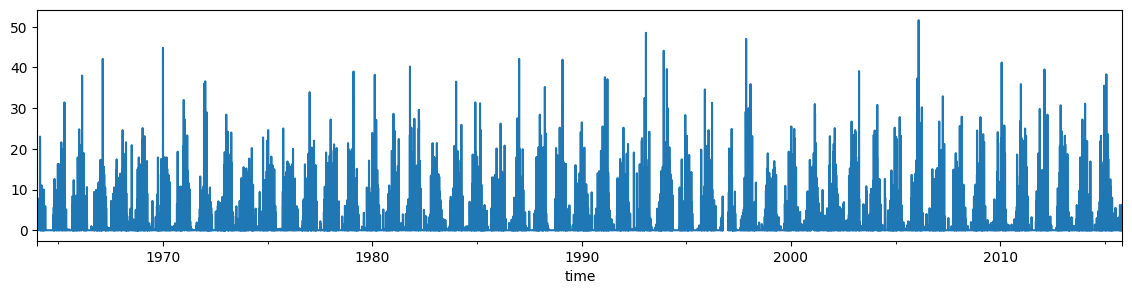

In [403]:
ax = df_copy['pp_acum'].plot(figsize = (14, 3))

### ACUMULADO MENSUAL

In [404]:
df_Acum_Month = df_copy.resample('M').sum()
df_Acum_Month = df_Acum_Month[['pp_acum']]
df_Acum_Month.head()

,pp_acum
time,
1964-01-31,13.0
1964-02-29,92.5
1964-03-31,101.6
1964-04-30,26.0
1964-05-31,6.5


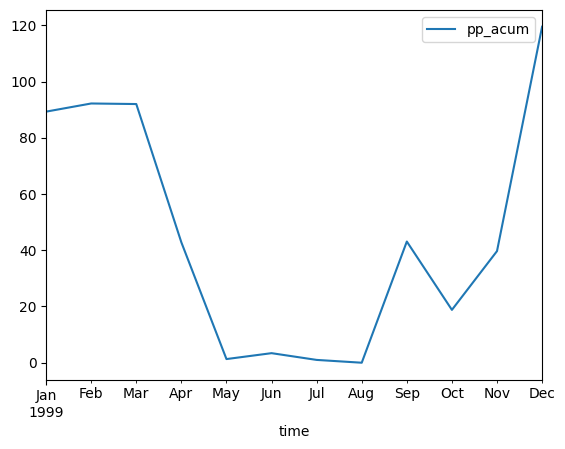

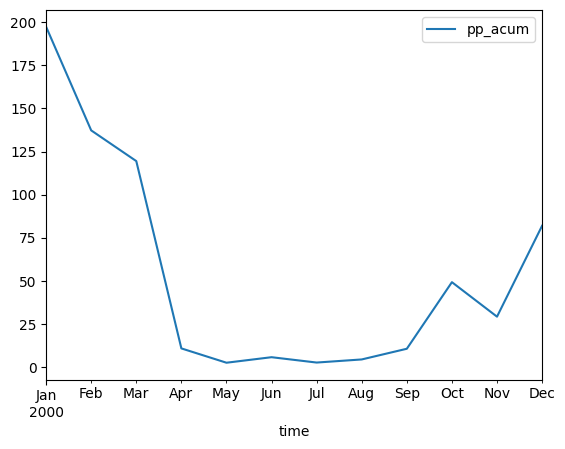

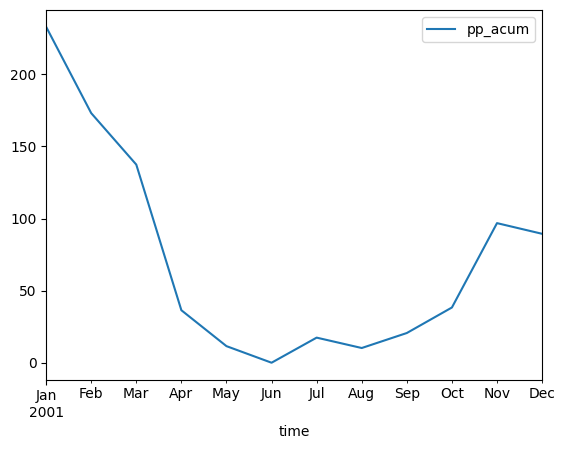

In [405]:
# Acumulado mensual para cada año
df_Acum_Month_years = df_Acum_Month["1999":"2001"].copy()
VectorAños = np.unique(np.array(df_Acum_Month_years.index.year))
for año in VectorAños:
    df_Acum_Month_years.loc[str(año)].plot()

Promedio de toda la serie : 55.34



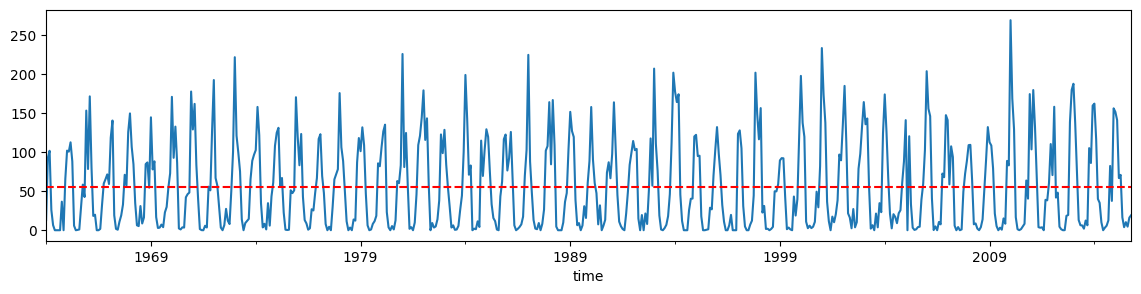

In [406]:
ax = df_Acum_Month['pp_acum'].plot(figsize = (14, 3))
ax.axhline(df_Acum_Month.pp_acum.mean(), color ='red', linestyle = '--')
print(f'Promedio de toda la serie : {df_Acum_Month.pp_acum.mean():.2f}\n')

# ANOMALÍAS MENSUALES

In [407]:
prom = df_Acum_Month.groupby(df_Acum_Month.index.month).mean().iloc[:,0].tolist()
std = df_Acum_Month.groupby(df_Acum_Month.index.month).std().iloc[:,0].tolist()
print(prom)
print('-----------------------')
print(std)

[143.6346153846154, 119.01730769230768, 97.95576923076922, 41.392307692307696, 6.213461538461539, 3.651923076923077, 3.8653846153846154, 6.003846153846154, 17.892307692307693, 46.33461538461539, 70.81176470588235, 108.66274509803922]
-----------------------
[49.70004886025683, 35.53400316379574, 34.12835870686038, 23.62047837135616, 5.416424869878721, 6.062080481045489, 6.51074179127846, 7.360305874357572, 12.763057076683657, 25.767306269732387, 35.02433809258255, 38.45343657352]


In [408]:
# ANOMALÍAS ENERO
(df_Acum_Month[df_Acum_Month.index.month == 1] - prom[0]).head()

,pp_acum
time,
1964-01-31,-130.634615
1965-01-31,-41.834615
1966-01-31,-65.334615
1967-01-31,-84.534615
1968-01-31,5.765385


In [409]:
# ANOMALÍAS MENSUALES
data_anom = df_Acum_Month.sub(df_Acum_Month.groupby(df_Acum_Month.index.month).transform('mean'))
data_anom.head()

,pp_acum
time,
1964-01-31,-130.634615
1964-02-29,-26.517308
1964-03-31,3.644231
1964-04-30,-15.392308
1964-05-31,0.286538


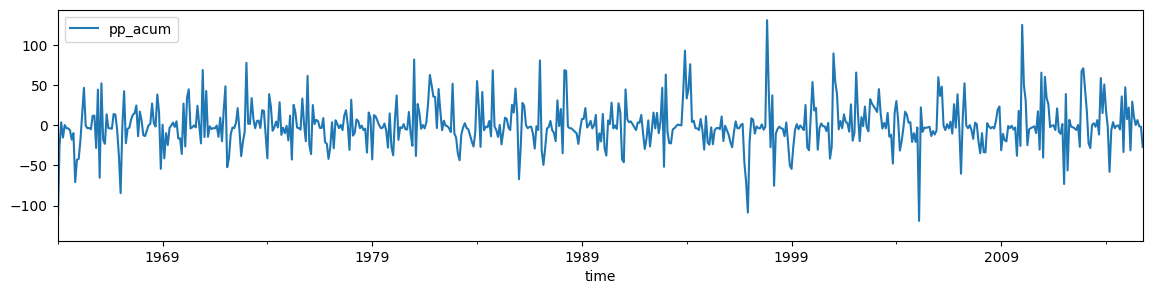

In [410]:
ax = data_anom.plot(figsize = (14, 3))

# ANOMALÍAS VS ANOMALÍAS ESTANDARIZADAS

In [411]:
# Anomalías mensuales estandarizadas
data_anom_std = data_anom.div(df_Acum_Month.groupby(df_Acum_Month.index.month).transform('std'))
data_anom_std.head()

,pp_acum
time,
1964-01-31,-2.628461
1964-02-29,-0.746252
1964-03-31,0.106780
1964-04-30,-0.651651
1964-05-31,0.052902


<Axes: xlabel='time'>

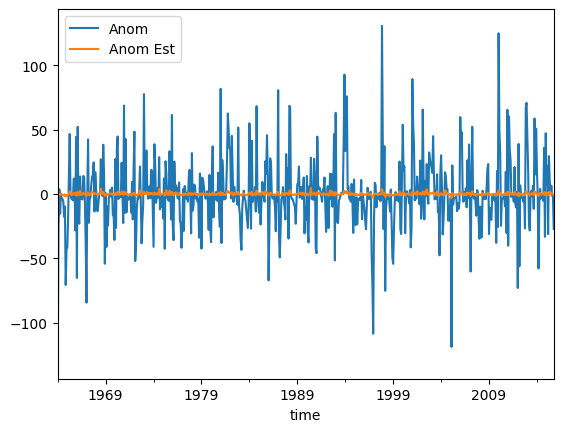

In [412]:
# Renombramos, Concatenamos y comparamos
data_anom = data_anom.rename(columns={'pp_acum': 'Anom'}) # Cambiamos también a data_anom
data_anom_std = data_anom_std.rename(columns={'pp_acum': 'Anom Est'})
df_Anoms = pd.concat([data_anom, data_anom_std], axis = 1)
df_Anoms.plot()

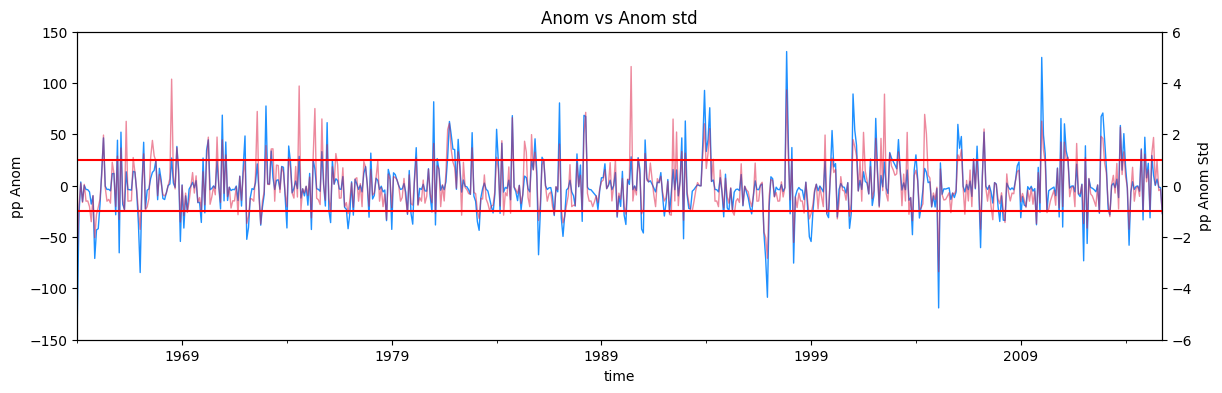

In [413]:
# Plot de comparación anom vs anom std
plt.figure()
ax = df_Anoms['Anom'].plot(style = 'dodgerblue', figsize = (14, 4), linewidth = 1)
ax2 = df_Anoms['Anom Est'].plot(secondary_y = True, style = 'crimson', linewidth = 1, alpha = 0.5)

ax.set_ylabel('pp Anom')
ax.right_ax.set_ylabel('pp Anom Std')
ax.set_title('Anom vs Anom std')

ax.set_ylim(-150, 150)
ax2.set_ylim(-6, 6)

ax2.axhline(1, color ='r', linestyle = '-')
ax2.axhline(-1, color ='r', linestyle = '-')
plt.show()

# BOOTSTRAPPING : Básicamente para generar intervalos de confianza (Monte Carlo)

---


https://www.linkedin.com/pulse/tiempedia-modelos-monte-carlo-en-pron%C3%B3sticos-de-mora-caballero-vmrle/

---



In [414]:
# Solo Eneros
df_ene = df_Acum_Month.loc[df_Acum_Month.index.month==1]
# Eligiendo un período climatológico
df_ene_c = df_ene.loc['1981':'2010']

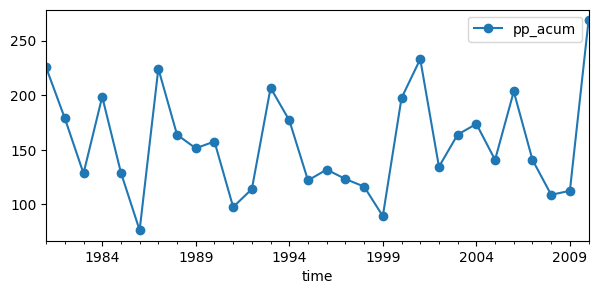

In [415]:
# Data Original
ax = df_ene_c.plot(marker='o', figsize = (7, 3))

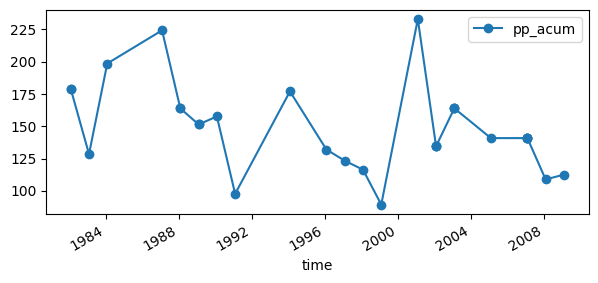

In [416]:
# Remuestreo (sample)
ax = df_ene_c.sample(n=30, replace = True).plot(marker='o', figsize = (7, 3))

In [417]:
# Hagamos un looping
promedios = []
# Mienteas más grande sea 1000, más cercano al promedio original será el promedio con bootstrapping
for i in range(1, 1000):
  a = df_ene_c.sample(n=30, replace = True).mean()[0]
  promedios.append(a)

Promedio sin bootstrapping : 156.3166666666667
Promedio con bootstrapping : 155.9436036036036
Intervalos de confianza al 95% : 139.55683333333332 - 172.64816666666664


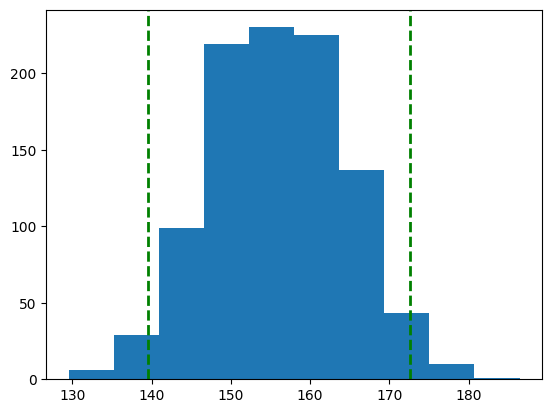

In [418]:
plt.hist(promedios)
# A un 95% de nivel de confianza
plt.axvline(np.percentile(promedios, 2.5), color = 'g', linestyle = '--', linewidth = 2)
plt.axvline(np.percentile(promedios, 97.5), color = 'g', linestyle = '--', linewidth = 2)

print(f'Promedio sin bootstrapping : {df_ene_c.pp_acum.mean()}')
print(f'Promedio con bootstrapping : {np.mean(promedios)}')
print(f'Intervalos de confianza al 95% : {np.percentile(promedios, 2.5)} - {np.percentile(promedios, 97.5)}')

# HISTOGRAMAS

---
### Es una manera gráfica de representar la distribución de frecuencias de un conjunto de datos

---




In [419]:
import seaborn as sns

<Axes: ylabel='Probability'>

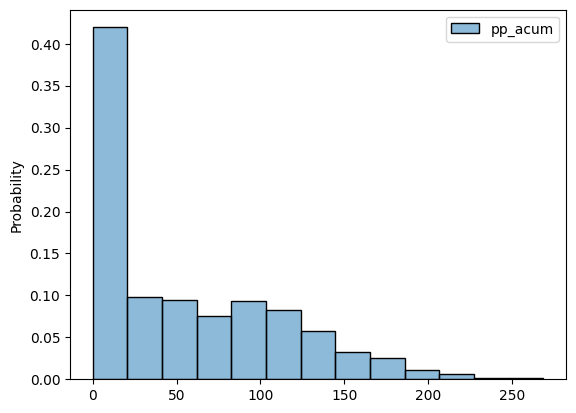

In [420]:
# Acumulados mensuales
sns.histplot(df_Acum_Month, stat='probability') # stat = density, count, frequency

<Axes: ylabel='Probability'>

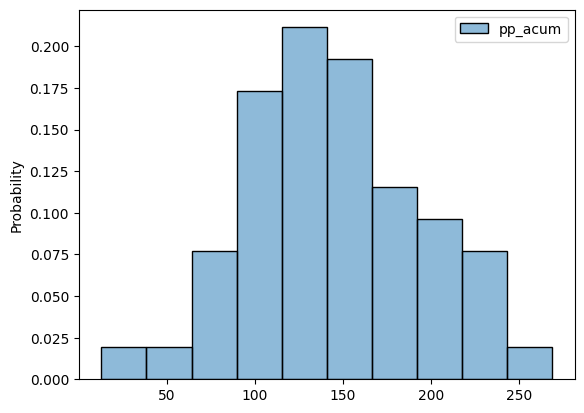

In [421]:
# Acumulados en Enero
sns.histplot(df_ene, stat='probability', bins =10) # stat = density, count, frequency

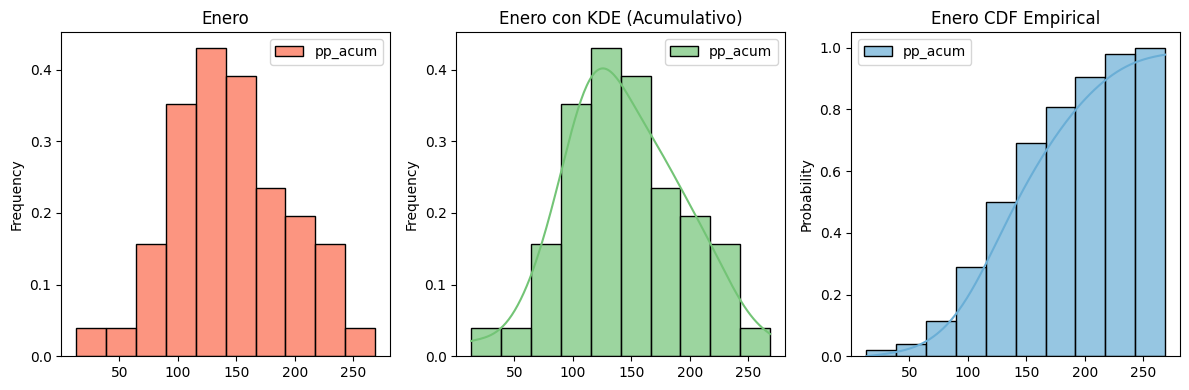

In [429]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

# Histograma sin KDE
sns.histplot(df_ene, stat='frequency', bins=10, palette='Reds', alpha=0.7, ax=axs[0])
axs[0].set_title("Enero")

# Kernel density smoothing : Estimación NO paramétrica
sns.histplot(df_ene, stat='frequency', bins=10, kde=True, palette='Greens', alpha=0.7, ax=axs[1])
axs[1].set_title("Enero con KDE (Acumulativo)")

# Histograma acumulativo
sns.histplot(df_ene, stat='probability', bins=10, kde=True, cumulative=True, palette='Blues', alpha=0.7, ax=axs[2])
axs[2].set_title("Enero CDF Empirical")
plt.tight_layout()
plt.show()

# EVOLUCIÓN DE HISTOGRAMAS

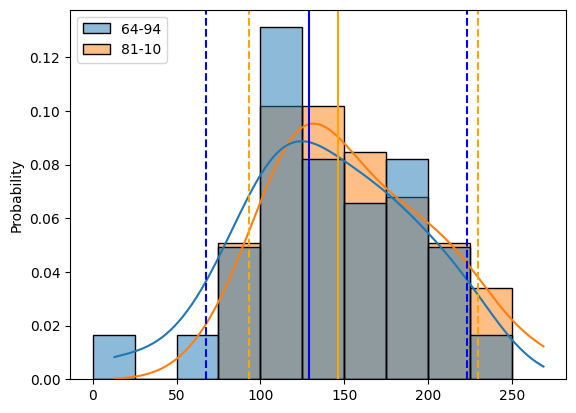

In [389]:
d1 = df_ene.loc['1964':'1994']
d3 = df_ene.loc['1981':'2010']
# -----------------------------------------------------
d1 = d1.rename(columns = {'pp_acum' : '64-94'})
d3 = d3.rename(columns = {'pp_acum' : '81-10'})
# d1 # -----------------------------------------------------
newdata = pd.concat([d1,d3], axis = 1)
sns.histplot(newdata, stat = 'probability', kde = True, bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.axvline(d1.median()[0], color = 'blue')
plt.axvline(d1.quantile(0.95)[0], color = 'blue', linestyle = '--')
plt.axvline(d1.quantile(0.05)[0], color = 'blue', linestyle = '--')
# d3 # -----------------------------------------------------
plt.axvline(d3.median()[0], color = 'orange')
plt.axvline(d3.quantile(0.95)[0], color = 'orange', linestyle = '--')
plt.axvline(d3.quantile(0.05)[0], color = 'orange', linestyle = '--')